#Performing EDA

####Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####Importing the dataset

In [5]:
df = pd.read_csv('/content/export.csv')

In [6]:
df

,Unnamed: 0,index,symbol,name,current_market_price,change,percent_change,volume,avg_volume,market_cap,pe_ratio,liquidty_score,earnings_yield,volatility_score,volume_acceleration
0,0,0,NVDA,NVIDIA Corporation,112.69,2.12,1.92,341755000.0,261527000.0,2.750000e+12,38.33,16.255,0.026,0.018813,1.306768
1,1,1,F,Ford Motor Company,9.90,0.29,3.02,138194000.0,78894000.0,3.923800e+10,6.78,18.556,0.147,0.029293,1.751641
2,2,2,PLTR,Palantir Technologies Inc.,84.90,4.44,5.52,105377000.0,97032000.0,1.991280e+11,446.86,12.271,0.002,0.052297,1.086003
3,3,3,WBA,"Walgreens Boots Alliance, Inc.",11.39,0.79,7.45,104361000.0,28666000.0,9.843000e+09,-1.00,36.381,-1.000,0.069359,3.640585
4,4,4,TSLA,"Tesla, Inc.",262.67,-0.78,-0.30,102370000.0,86215000.0,8.448830e+11,128.13,14.162,0.008,0.002970,1.187380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,351,351,X,United States Steel Corporation,36.23,-0.96,-2.58,5152000.0,7056000.0,8.160000e+09,23.08,7.237,0.043,0.026497,0.730159
352,352,352,WIT,Wipro Limited,3.26,-0.02,-0.61,3876000.0,4739000.0,3.418400e+10,23.29,8.616,0.043,0.006135,0.817894
353,353,353,HWM,Howmet Aerospace Inc.,124.40,-0.09,-0.07,5132000.0,2722000.0,5.038500e+10,44.27,20.178,0.023,0.000723,1.885378
354,354,354,BAM,Brookfield Asset Management Ltd.,48.61,-1.69,-3.36,5126000.0,1398000.0,7.888100e+10,36.55,39.956,0.027,0.034767,3.666667


###FInding the hottest stocks right now
Most actively traded stocks of the day

In [12]:
df.sort_values(by='volume',ascending=False).head()[['name','current_market_price','change']]#hottest stocks of the day

,name,current_market_price,change
0,NVIDIA Corporation,112.69,2.12
1,Ford Motor Company,9.90,0.29
2,Palantir Technologies Inc.,84.90,4.44
3,"Walgreens Boots Alliance, Inc.",11.39,0.79
4,"Tesla, Inc.",262.67,-0.78


####Stocks swinging right now
Represents the stocks that are in constant public eye and traded actively

[]

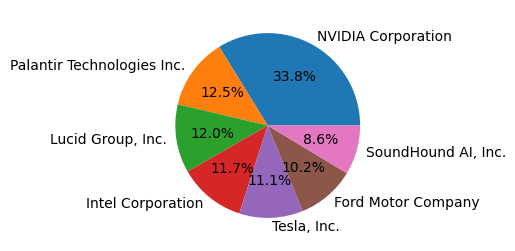

In [19]:
#high velocity stocks
high_velo = df.sort_values(by='avg_volume',ascending=False).head(7)[['name','avg_volume']]
plt.figure(figsize=(3,3))
plt.pie(high_velo['avg_volume'],labels=high_velo['name'],autopct="%1.1f%%")
plt.plot()

###Blue chip compounders
Shows the stocks with highest market capitalization representing large organizations

[]

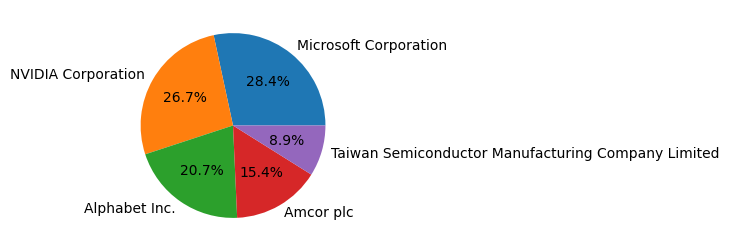

In [22]:
blue_chips = df.sort_values(by='market_cap',ascending=False).head()[['name','market_cap']]
plt.figure(figsize=(3,3))
plt.pie(blue_chips['market_cap'],labels=blue_chips['name'],autopct='%1.1f%%')
plt.plot()

###Liquid as Water
Shows stocks  with highest liquidity often represnting lower price variations  

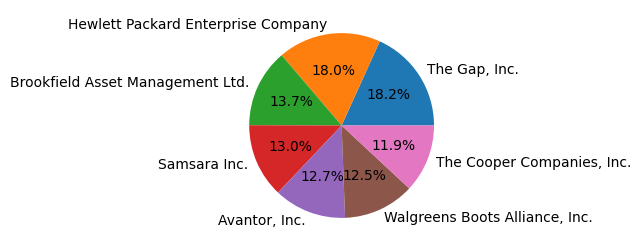

In [25]:
liquids = df.sort_values(by='liquidty_score',ascending=False).head(7)[['name','liquidty_score']]
plt.figure(figsize=(3,3))
plt.pie(liquids['liquidty_score'],labels=liquids['name'],autopct='%1.1f%%')
plt.show()

###Potentially undervalued stocks
Shows stocks with highest earnings yeild

In [36]:
def avg_earning_yeild(earnings_yield):
  total = 0
  for i in earnings_yield.values:
    if(i==-1):
      continue
    total += i
  return total/len(earnings_yield)

In [37]:
yield_constraint = avg_earning_yeild(df['earnings_yield'])

In [38]:
yield_constraint

0.04363483146067414

In [47]:
potenitally_undervalued = df.sort_values(by='earnings_yield',ascending=False)[df['earnings_yield']>yield_constraint].head(10)[['name','current_market_price','percent_change']]

<ipython-input-47-4e84181f0f05>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  potenitally_undervalued = df.sort_values(by='earnings_yield',ascending=False)[df['earnings_yield']>yield_constraint].head(10)[['name','current_market_price','percent_change']]


In [50]:
potenitally_undervalued['percent_change'] = potenitally_undervalued['percent_change'].apply(lambda x : str(x)+'%')

In [51]:
potenitally_undervalued

,name,current_market_price,percent_change
229,ZIM Integrated Shipping Services Ltd.,20.75,4.96%
121,IAMGOLD Corporation,5.50,0.18%
226,The Western Union Company,11.62,5.06%
63,The AES Corporation,11.25,3.5%
266,Synchrony Financial,54.74,1.09%
66,Stellantis N.V.,12.73,-0.16%
1,Ford Motor Company,9.90,3.02%
110,"Macy's, Inc.",14.06,6.35%
25,Vale S.A.,9.90,1.23%
113,General Motors Company,47.44,0.76%


###Volume Jerks
shows stocks which have increase in volume as compared to historical averages

In [52]:
lookout = df.sort_values(by='volume_acceleration',ascending=False).head(10)[['name','current_market_price','volume']]

In [53]:
lookout

,name,current_market_price,volume
22,"The Gap, Inc.",23.15,30396000.0
6,Hewlett Packard Enterprise Company,15.81,78858000.0
118,Samsara Inc.,35.36,13177000.0
57,"Avantor, Inc.",17.50,21403000.0
354,Brookfield Asset Management Ltd.,48.61,5126000.0
3,"Walgreens Boots Alliance, Inc.",11.39,104361000.0
340,"The Cooper Companies, Inc.",85.00,5337000.0
23,Algonquin Power & Utilities Corp.,4.80,30475000.0
30,Southwest Airlines Co.,29.20,27547000.0
330,Discover Financial Services,167.52,5053000.0
